In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import datasets

In [39]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [40]:
housing_df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
housing_df['HousePrice'] = housing.target
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#Predict the Price of a house based on the attributes


In [41]:
housing_df.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


#Find any missing values
- None found = all zero's

In [42]:
housing_df.isna().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
HousePrice,0


#Visualize pairwise values
- Provides a Visual View of the Relationships between 2 parameters: House Price and each other variable

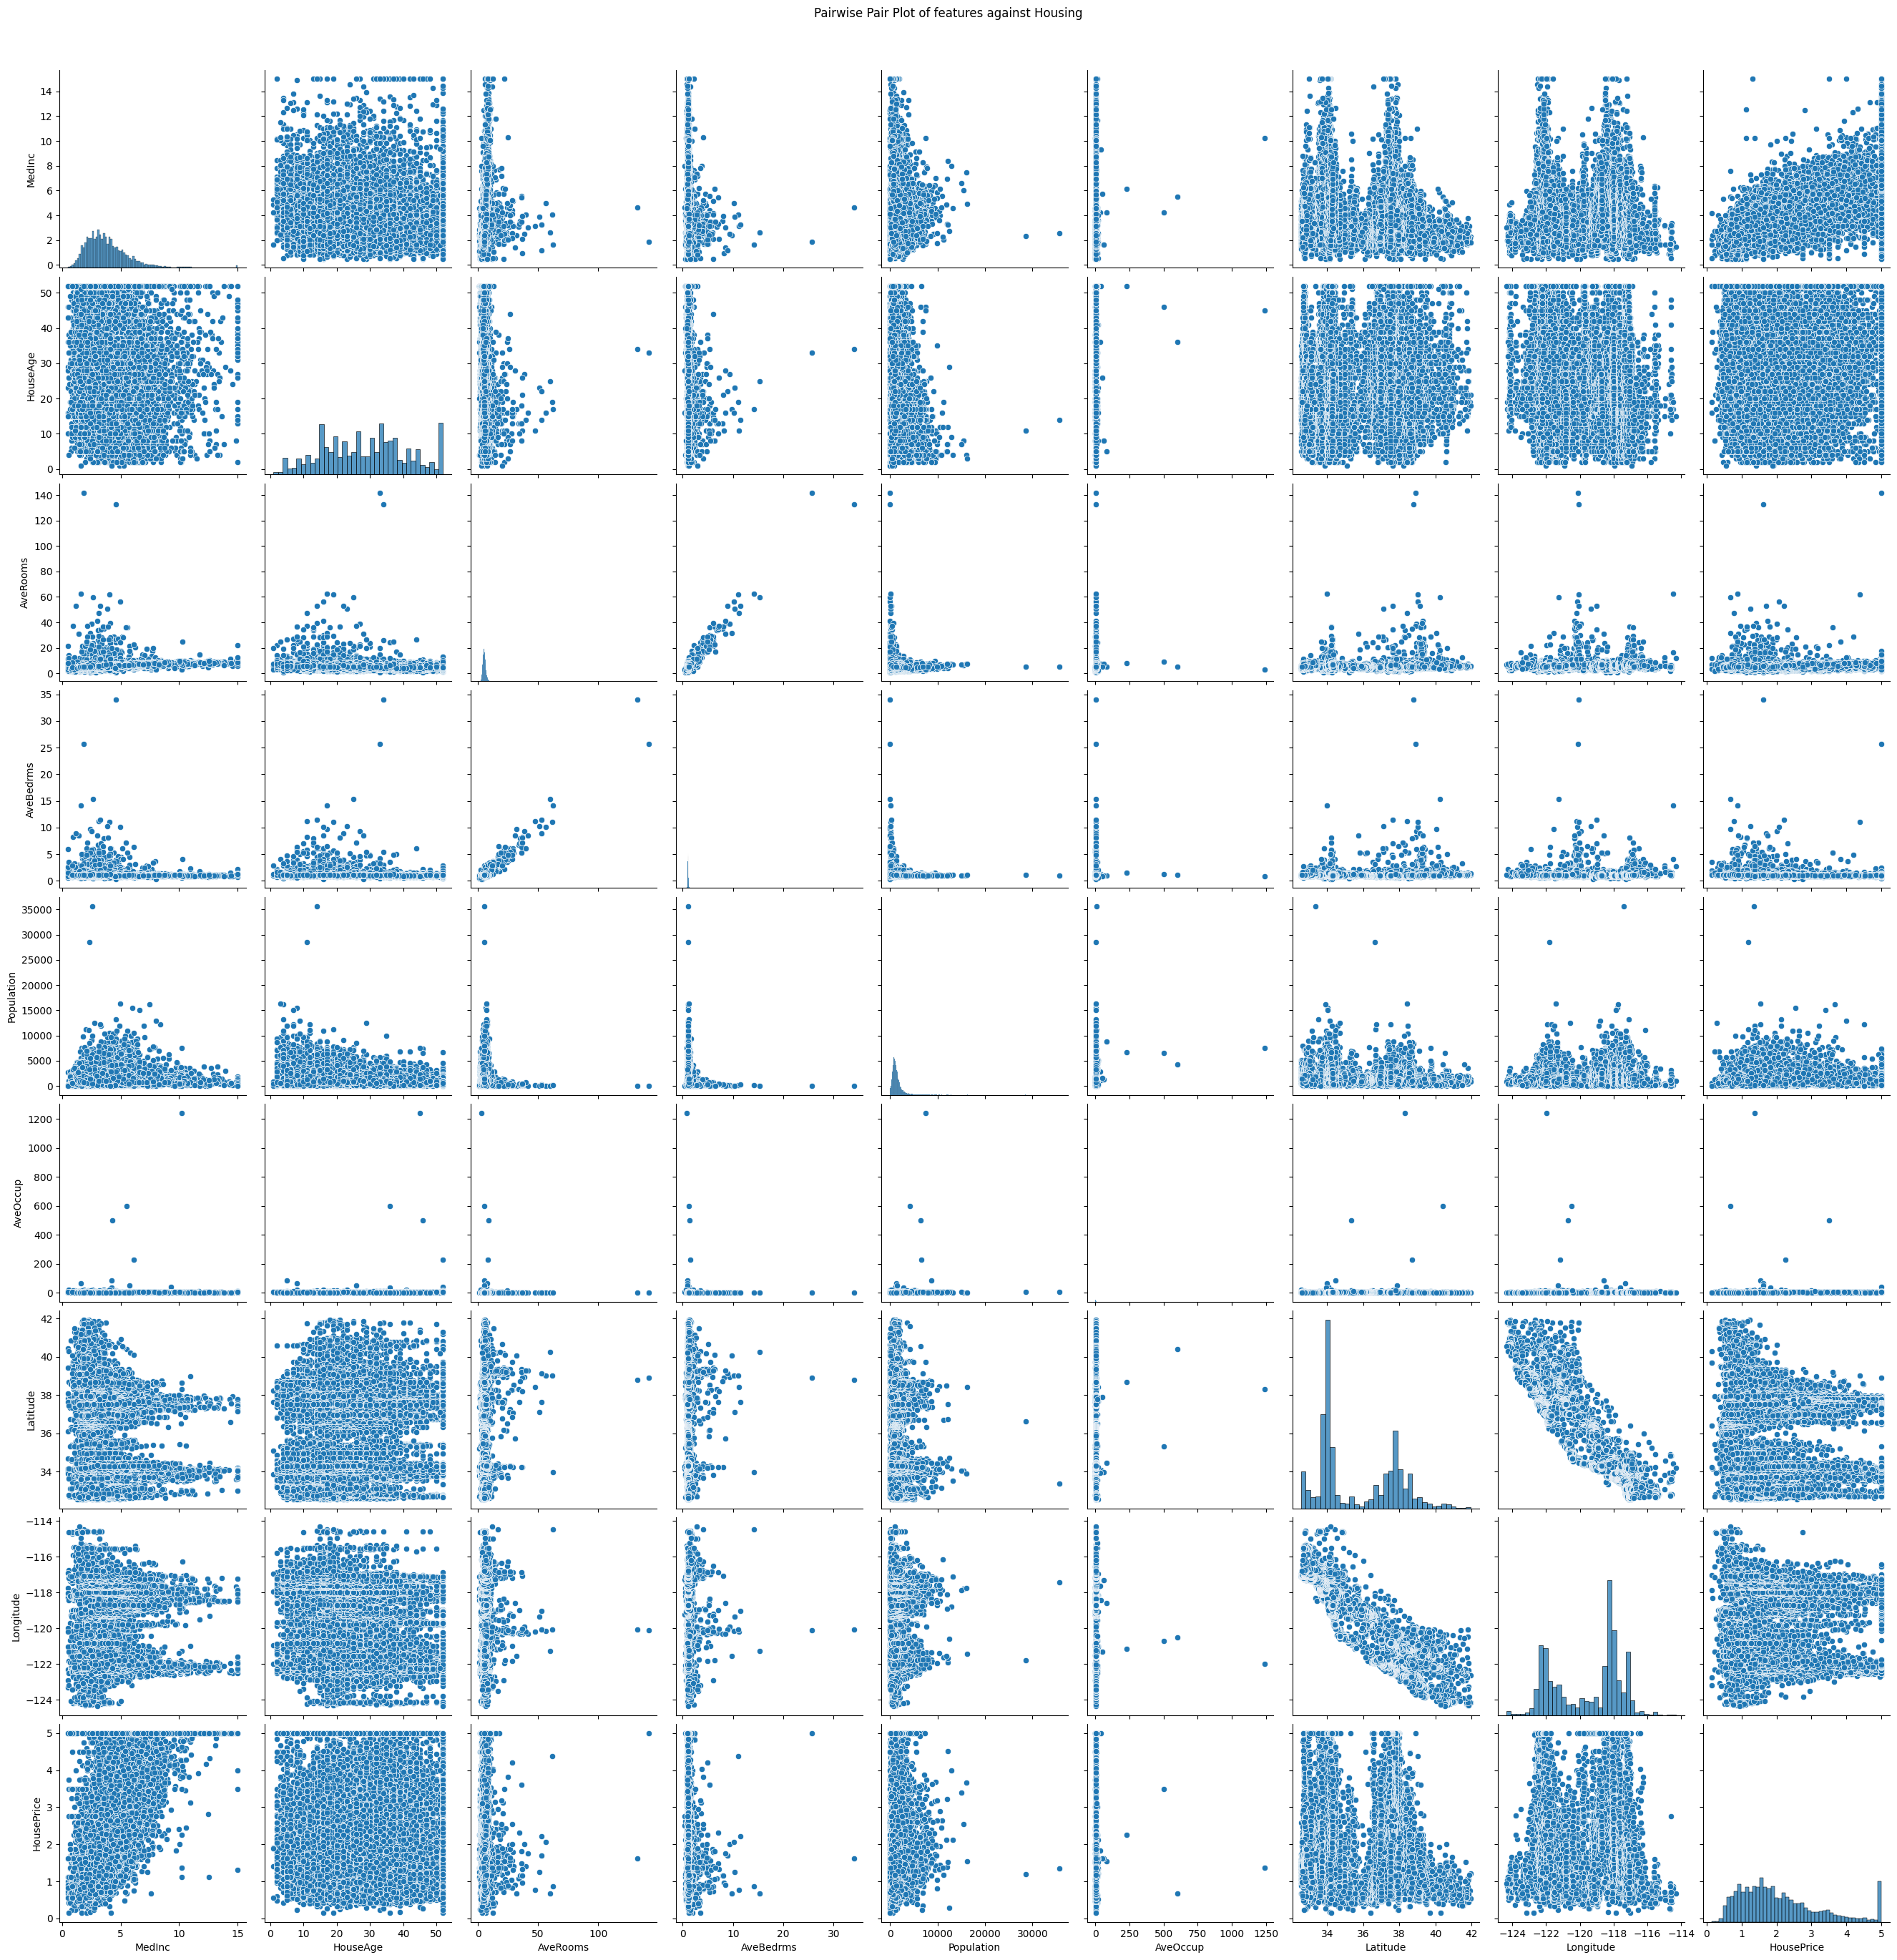

In [43]:
sns.pairplot(housing_df, height=3)
plt.suptitle('Pairwise Pair Plot of features against Housing', y=1.02)
plt.show()

#Plot the Geographic distribution of Data Points
- based on Longnitude and Latitude
- size of each point represents the population
- color indicates the house prices
- offering a visualization of house prices vs. housing density
- showing houses closest to the ocean shown in red are higher priced suggesting a corlation based on proximity to the ocean




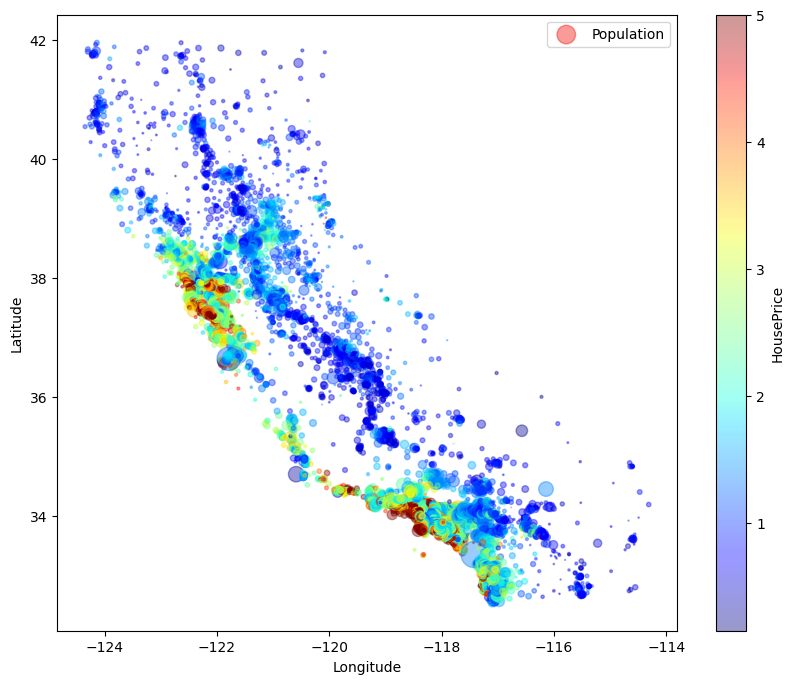

In [44]:
housing_df.plot(
    kind='scatter',
    x='Longitude',
    y='Latitude',
    alpha=0.4,
    s=housing_df['Population']/100,
    label='Population',
    c='HousePrice',
    cmap='jet',
    colorbar=True,
    figsize=(10, 8)
)
plt.show()

#Check for Multicolumnarity
- the variance inflation factor (IF) for each predictor
- first, compute the correlation between feature variables and visualize it using a heat map


<Axes: >

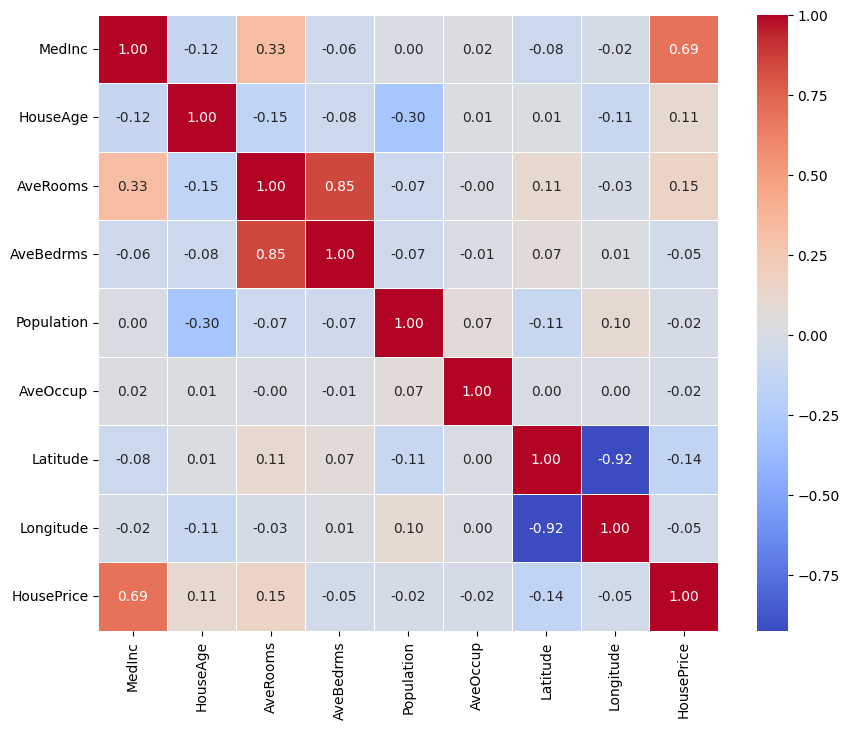

In [45]:
corr = housing_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidth=0.5)


#Compute and Display the absolute correlation values of HousePrice and other variables sorting them into descending order


In [46]:
corr["HousePrice"].abs().sort_values(ascending=False)


,HousePrice
HousePrice,1.000000
MedInc,0.688075
AveRooms,0.151948
Latitude,0.144160
HouseAge,0.105623
AveBedrms,0.046701
Longitude,0.045967
Population,0.024650
AveOccup,0.023737


#plot Scatter Plots
- Medical Insurance and HousePrice

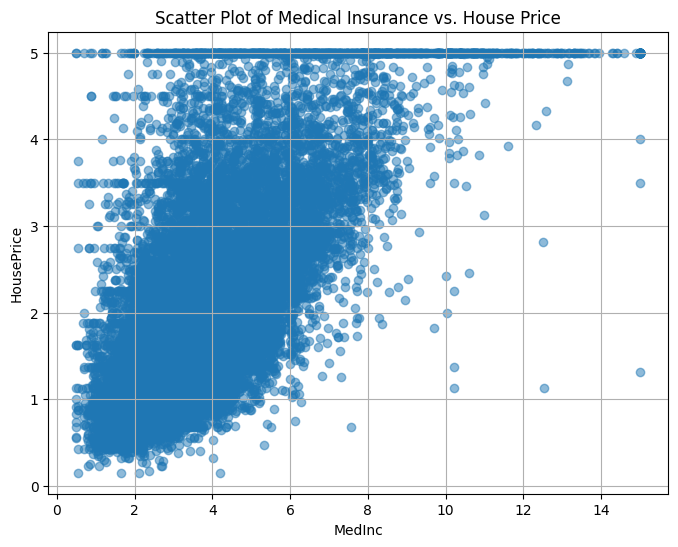

In [47]:
medinc = housing_df['MedInc']
houseprice = housing_df['HousePrice']
plt.figure(figsize=(8, 6))
plt.scatter(medinc, houseprice, alpha=0.5)
plt.title('Scatter Plot of Medical Insurance vs. House Price')
plt.xlabel('MedInc')
plt.ylabel('HousePrice')
plt.grid(True)
plt.show()

#Calculate the Variance Inflation Factor (IF) for each feature in the Housing Data set
- to identify multicolinearity
- the VIF helps predict the correlation between predictors and drop features
- Note: Latitude and Longnitude have very high VIF scores indicating mulicolinearity issues with other predictors
- Addressing these features is crucial to improving modeling stability!


In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
housing_df_vif = housing_df.drop('HousePrice', axis=1)
housing_df_vif = housing_df_vif.apply(pd.to_numeric, errors='coerce')

vif_data = pd.DataFrame()
vif_data["Feature"] = housing_df_vif.columns
vif_data["VIF"] = [variance_inflation_factor(housing_df_vif.values, i) for i in range(len(housing_df_vif.columns))]
print(vif_data)

      Feature         VIF
0      MedInc   11.511140
1    HouseAge    7.195917
2    AveRooms   45.993601
3   AveBedrms   43.590314
4  Population    2.935745
5    AveOccup    1.095243
6    Latitude  559.874071
7   Longitude  633.711654


#Remove the Latitude and Longnitude columns from the housing_df data set
- to eliminate multicolomnarity issues



In [49]:
housing_df = housing_df.drop(['Latitude', 'Longitude'], axis=1)


#Convert selected columns in housing_df data set to numeric
- add a constant to the features
- then fit an OLS regression model using stats models

In [50]:
cols_to_convert = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
housing_df[cols_to_convert] = housing_df[cols_to_convert].apply(pd.to_numeric, errors='coerce')
housing_df['HousePrice'] = pd.to_numeric(housing_df['HousePrice'], errors='coerce')

X = sm.add_constant(housing_df.drop('HousePrice', axis=1))
y = housing_df['HousePrice']

model = sm.OLS(y, X).fit()

#Perform Residual Analysis to Validate linear regression assumptions
- and visualize the distribution of residuals and their relationship of predicted values
- Discuss the significance of the model coefficients to understand each feature influences the target variable
- The histogram has a somewhat normal distibution with outliers towards the high side.
- Large numbers of scattered data above and/or below the red dashed center line indicates many outliers and questions the model's accuracy
#The model coefficients indicate the models feature impacts on the house price.
- A positive coefficient (MedInc, AvgBed) suggests a positive correlation to house prices. AvgBed shows the most positive significance.
- A negative coefficient (AveRoom) suggests a negative correlation to house prices



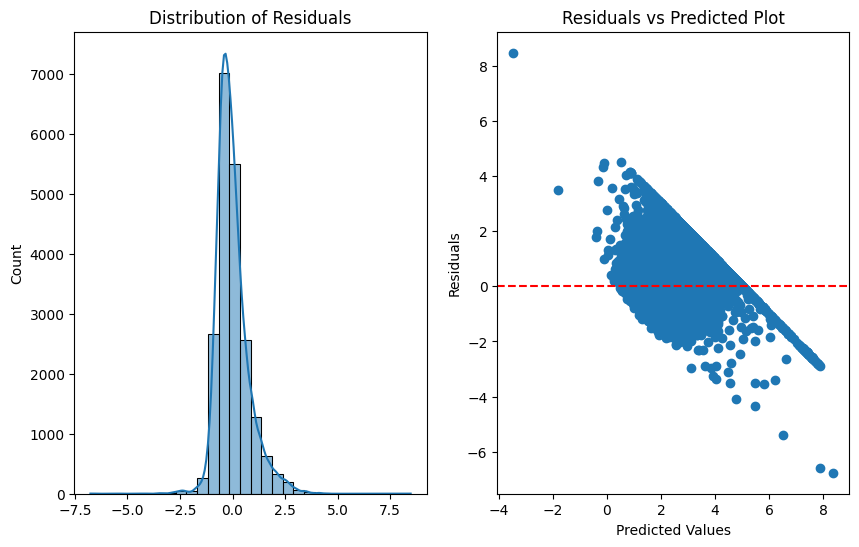

Model coefficients:
 const        -0.439093
MedInc        0.536910
HouseAge      0.016503
AveRooms     -0.211740
AveBedrms     0.993730
Population    0.000022
AveOccup     -0.004877
dtype: float64


In [51]:
residuals = model.resid

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.histplot(residuals, bins=30, kde=True)

plt.title('Distribution of Residuals')
plt.subplot(1, 2, 2)
plt.scatter(model.predict(X), residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()
print("Model coefficients:\n", model.params)


#Let's compute and interpret the R-squared
- using MSE metrics to evaluate the performance of the Linear Regression model on the housing data
- Model explains approximately 54% of the variance of the dependent variable with mean-squared error of 0.61 indicating moderate predictive performance
#Visual Distribution of several Predictors
- Target Variable using Box Plots to identify potential outliers that might impact the model evaluation.
- The function plot_boxplots displays Box Plots for each column in the housing data frame offering insight into the distribution and presence of outliers for individual features
# Box Plot Results:
- Observe outliers and features like MedInc, Population, and House Price which adversely affect model performance
- It's essential to address them for improved model accuracy.



In [52]:
from sklearn.metrics import mean_squared_error, r2_score
predictions = model.predict(X)

print("R-squared:", r2_score(y, predictions))
print("MSE:", mean_squared_error(y, predictions))

R-squared: 0.5396977345638283
MSE: 0.6129156196698703


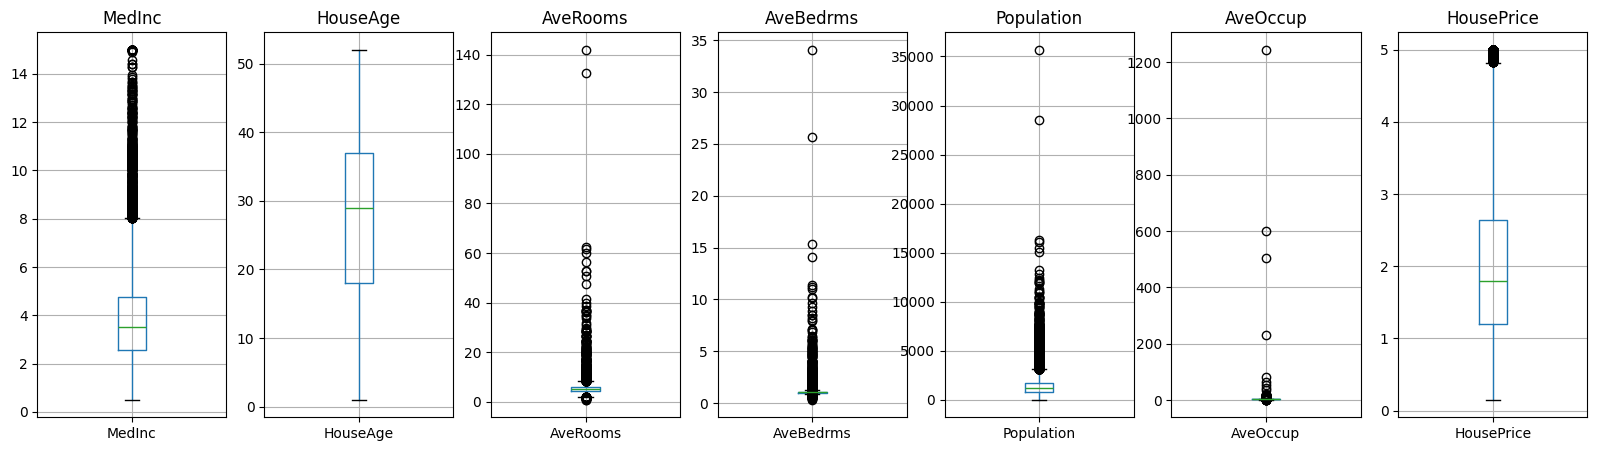

In [53]:
import matplotlib.pyplot as plt

def plot_boxplots(df):

  fig, axes = plt.subplots(1, len(df.columns), figsize=(20, 5))

  for i, column_name in enumerate(df.columns):
    df.boxplot(column=column_name, ax=axes[i])
    axes[i].set_title(column_name)

  plt.show()

plot_boxplots(housing_df)

#Create a function remove_outliers
- that iterates through each column to calculate the lower and upper bounds based on the intercord L-range and replace outliers with these bounds
- this approach preserves data set integrity by retaining potential value insights from outliers while reducing their impact on statistical analysis and ML models.
- the clean data frame housing_df_new is returned without the outlier values
- housing_df_new depicts the data set features after replacing the outliers withe the lower and upper bounds ensuring extreme values are within reasonable limits.


In [54]:
def remove_outliers(df):
    df_no_outliers = df.copy()

    for column_name in df.columns:
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)

        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_no_outliers[column_name] = df[column_name].apply(lambda x: lower_bound if x < lower_bound
                                                          else (upper_bound if x > upper_bound else x))

    return df_no_outliers

housing_df_new = remove_outliers(housing_df)


#Let us now realize the distribution of Predictors
- and the target variable in the clean data frame housing_df_new using Box Plots observing the impact of outlier removal on the data distribution and potential changes on the feature ranges
- this will help in assessing the effectiveness of the outlier removal process.

-

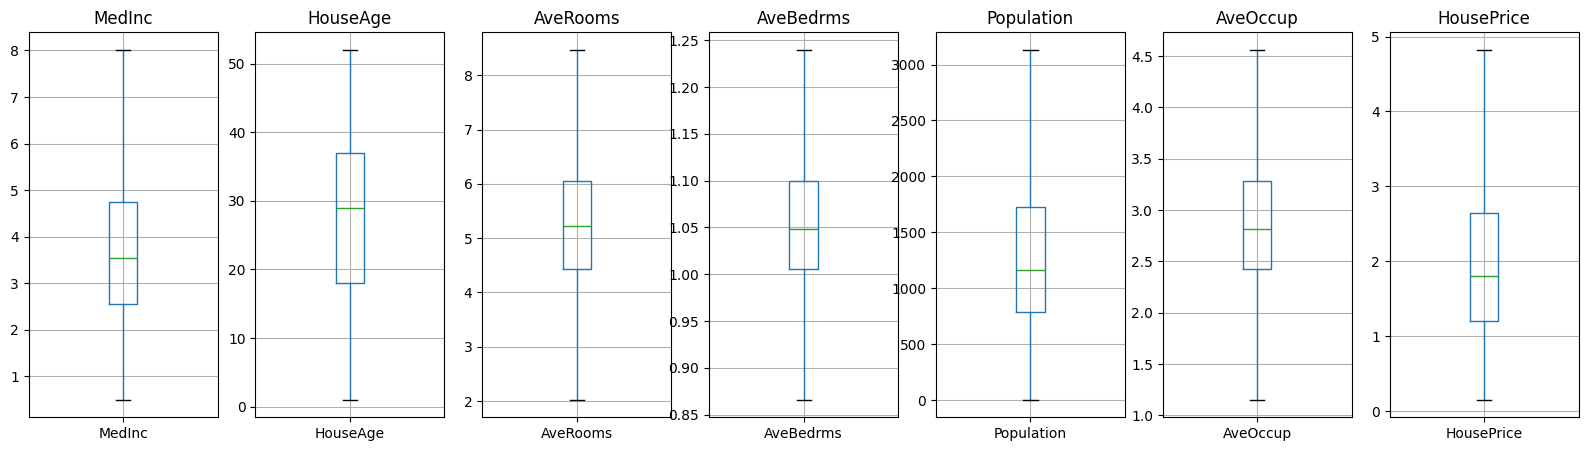

In [55]:
plot_boxplots(housing_df_new)


In [56]:
housing_df_new = remove_outliers(housing_df)

#Now fit the linear regression model on the clean data frame housing_df_new
- the selected columns are converted to numeric
- a constant is added to include the y-intercept
- and then the OLS regression model is fitted to evaluate the model's performance after outlier removal
- Next visualize the distribution of residuals and the relationship between residuals and predicted values for the fitted linear regression model housing_df_new
- the new histrogram shows a more bell shaped plot that is tighter and more symmetric indicating the extreme outliers have been removed and the residuals are more normally distributed
- The Residuals vs Predicted Scatter plot shows a more evenly distributed points around the zero line indicating consistent residual variance, the range is reduced without outliers
- the updated model coefficients interpret the impact of each model feature on the house price with AvgBedRooms showing the most significant positve influence on house price and AvgRooms having negative impact



In [57]:
cols_to_convert = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
housing_df_new[cols_to_convert] = housing_df_new[cols_to_convert].apply(pd.to_numeric, errors='coerce')
housing_df_new['HousePrice'] = pd.to_numeric(housing_df_new['HousePrice'], errors='coerce')

X = sm.add_constant(housing_df_new.drop('HousePrice', axis=1))
y = housing_df_new['HousePrice']

model = sm.OLS(y, X).fit()


Model coefficients:
 const        -1.025744
MedInc        0.634138
HouseAge      0.018696
AveRooms     -0.258632
AveBedrms     2.308808
Population    0.000079
AveOccup     -0.357348
dtype: float64


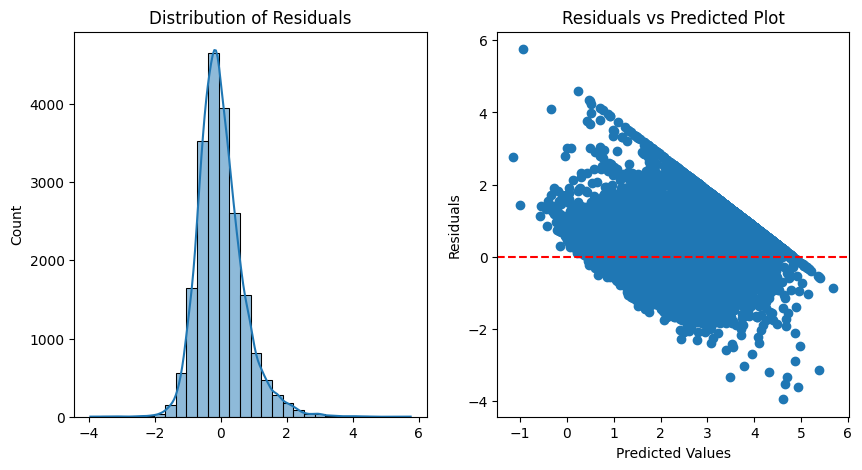

In [58]:
residuals = model.resid

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribution of Residuals')

plt.subplot(1, 2, 2)
plt.scatter(model.predict(X), residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show

print("Model coefficients:\n", model.params)


#Compute and Interpret the R-square and MSE metrics
- for the fitted linear regression model housing_df_new to evaluate its performance
- the R-square score measures the portion of variance in the dependent variable explained by the independent variables
- while MSE quantifies the average square difference between the predicted and actual values providing insights to the model's accuracy after outlier removal
- the results is the R-squared value increased from 0.54 to .618 indicating a better fit. MSE decreased from 0.613 to 0.490 showing improved prediction accuracy
- Outlier removal notably enhanced its predictive capability
#This structured process covers all aspects of linear regression
- starting with getting the data ready to evaluate the model
- includes checking assumptions, assessing multicolumnarity, ensuring a thorough examination
- inclusion of outlier removal showcases of data preprocessor techniques


In [59]:
from sklearn.metrics import mean_squared_error, r2_score
predictions = model.predict(X)

print("R-squared:", r2_score(y, predictions))
print("MSE:", mean_squared_error(y, predictions))


R-squared: 0.617696810976802
MSE: 0.49001892235770017
